In [24]:
!jupyter nbconvert Week1_T0.ipynb --to slides --post serve

[NbConvertApp] Converting notebook Week1_T0.ipynb to slides
[NbConvertApp] Writing 706367 bytes to Week1_T0.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Week1_T0.slides.html
Use Control-C to stop this server
^C

Interrupted


In [12]:
import seaborn as sns
import numpy as np
import pandas as pd
from  sklearn import linear_model
import matplotlib.pyplot as plt

# Applied Machine Learning Overzicht


1.  Alles via Canvas
2. Huiswerk in groepjes, elke week een ander groepje uit jouw klas
    3. Wordt nagekeken, jullie krijgen feedback, en alles komt anoniem op github.
    4. Behandel huiswerk in het tweede college in de week. 

## tentamens

* 2 deeltentamens, ieder 50%, 2 uur in Jupyter notebook.
* Volgende dag, responsiecollege, en hopelijk ook nagekeken.

# What is Machine Learning?


>Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions on new unseen data, without being explicitly programmed to do so.

#  **Week by week Course setup**

1. Introductie, KNN
3. unsupervised learning
2. Evaluatie
4. Exam
6.	Regressie
5.  Classificatie
7. Neural networks;Wrap up
8. Exam

## Data Science/Machine Learning "steps"

1. “Interacting with the outside world
    * Reading and writing with a variety of file formats and databases.
2. Preparation
    * Cleaning, munging, combining, normalizing, reshaping, slicing and dicing, and transforming data for analysis.
3. Transformation
    * Applying mathematical and statistical operations to groups of data sets to derive new data sets. 
    * For example, aggregating a large table by group variables.
4. Modeling and computation
    * Connecting your data to statistical models, machine learning algorithms, or other computational tools
5. Presentation
    * Creating interactive or static graphical visualizations or textual summaries”

Excerpt From: Wes McKinney. “Python for Data Analysis.”

* Steps 1-3 is the topic of your data science course. 
* **Step 4 is the topic of this course.**
* Step 5 of your Information Visualization course. 


# Python
* Python is great for data science, as it let you do all these steps inside one programming framework.
* Using notebooks, you can in fact do all these steps inside one notebook for a small project. 

# Learning outcomes of this course


See Canvas

1. You can answer these questions: What is ML? What can it do and what not?
2. You can make a good prediction whether a certain task is suitable to be solved by ML, **given the data available**.
3. You are able to run ML algorithms on *clean data*, to improve them, and to compare their performance.
4. You are able to evaluate the quality of an ML model.
5. You understand how one fits a *regression line* through a data point cloud, and appreciate the beauty and cunningness of the used method, called *gradient descent*.
5. You can explain to some extend what a neural network is, and how it learns.
6. You are a lot more comfortable with programming in Jupyter notebooks than you are today.

# Tips for passing this course

### At the lectures

* Sit in front of the class.
* Make (lots of) notes
    * Especially when he explains something "theoretical"
        * That Marx-guy loves to ask exam questions about such things
        

### At home

* Get really handy with the notebook/Python/Pandas **without Google/internet/StackOverflow**
    * but with `period TAB` and `function?` and `method?`
    

### In your group

* check and question each other
    * ~~in partucluar when you partition the assignment~~
* use your peers
* discuss the four found solutions, compare them, and refactor them into one supergreat solution.

### Don't think you learn something from seeing the answer to a problem.

* If you still do, I suggest
    * answer the problem from the top of your head on the way home in the bus/on your bike
    * same, but at home in a notebook
    * witghout fooling yourself.
* also for me that is often very hard.

# Attention: pencils ready

*  theoretical topics ahead
    * evaluation,  
    * baselines

# ML and evaluation

* In machine learning we always **evaluate** models:
    * **Classification:** 
        * Accuracy, Precision, Recall,  F1
    * **Regression:** 
        * RMSE
        
![](https://miro.medium.com/max/1222/1*jopCO2kMEI84s6fiGKdXqg.png)        
    

# Just a short (<strike>intelligence</strike>) test

* RMSE
    * Root
        * Mean
            * Squared
                * Error
                
## Program it in Python

* You are given two arrays `true` and `predicted` of the same length with the values


In [13]:
from math import sqrt

true= [2,3,5,2,4]
predicted= [2,2,4,2,5]

def rmse(A,B):
    N= len(A)
    return sqrt( sum( (A[i]-B[i])**2  for i in range(N) )
                 /
                N
               )

rmse(true,predicted)

0.7745966692414834

# In reality in ML:


* vectorized computations
    * very very fast
    * super elegant

In [14]:
import numpy as np

def rmse(A,B):
    A,B = np.array(A), np.array(B)
    return sqrt( ((A-B)**2).mean()  )

rmse(true,predicted)

0.7745966692414834

# Baselines


### Your problem if you have to convince your manager/examiner/friend/....
* Suppose you have trained a classifier and it has accuracy $A$.
    * Is that good?
    * How to assess that?
    

* **Compare to a baseline!**

* Baseline? 
    * A predictor "learned" using only **global** information
        * **That is, the distribution of the classes or values  over the population.**
    * Your predictor is only based on  "prejudice"
    * It does not use any feature of an instance
    

## a rule-based predictor!

# Your turn: what would be a good baseline for

### Geslacht informatiekunde student

* waarom?

### Jullie cijfer voor dit vak



### het aantal uur zon vandaag



#  What would be a good baseline for tipping?

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


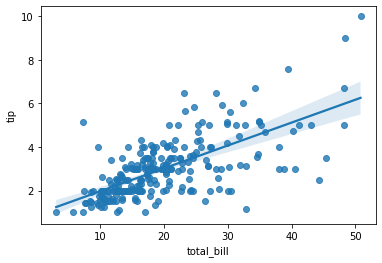

In [15]:
tips = sns.load_dataset('tips')
print(tips.shape)
sns.regplot(x='total_bill', y='tip', data=tips);
tips.head(2)

# Baseline 

* The best guess, based only on the tip column.

* mean or median!
* A horizontal straight line in our plot: we always tip the same amount, no matter the price on the bill

In [16]:
round(tips.tip.mean(),2), round(tips.tip.median(),2)

(3.0, 2.9)

# Evaluate!

* RMSE of course!

In [17]:
rmse(tips.tip.values,tips.tip.mean())

1.3807999538298954

In [18]:
# much better. 
# Please do not come over as naieve and pretend you know 
# something with such precision
# Even at Olimpic games they do not measure up to such precision

round(rmse(tips.tip.values,tips.tip.mean()),2)

1.38

# Huh?

* What is crazy here? `rmse(tips.tip.values,tips.tip.mean())`

* `tips.tip.values` is a long array of values
* `tips.tip.mean()` is just a number.
* RMSE is comparing two equal array lengths

In [19]:
true=tips.tip.values
predicted = [tips.tip.mean() for _ in range(len(true))]

rmse(true,predicted)

1.3807999538298954

#### Rubberband nature of numpy and pandas: broadcasting

# Always compare your learned model to baselines

* It  schould really do better than  the baseline.
* "really" means **significant**
    * in the true meaning of that word: which chance less than 5% that we are wrong (and the learned model  is NOT doing better)
* Topic in week    3 

# The scikit learn ML steps

In [20]:
# 1. choose a model
regr = linear_model.LinearRegression()

# 2.Prepare data: X = explanatory variables, y: outcome 
X= tips.total_bill.values.reshape(-1, 1)
y= tips.tip.values.reshape(-1, 1)

# 3.  Train the model using all data
regr.fit(X,y) 

# 4. Make predictions using all data
y_pred = regr.predict(X)

# 5 . Evaluate 

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % rmse(y,  y_pred))
 

Coefficients: 
 [[0.10502452]]
Mean squared error: 1.02


In [21]:
# Huh reshape(-1,1)
O= tips.total_bill.values
New= tips.total_bill.values.reshape(-1, 1)
print(O.shape)
print(New.shape)
print(O[:5]) 
print(New[:5])
# You just turn a 1D list into a 2D matrix/spreadsheet with one column
# The data/information content stays the same.

(244,)
(244, 1)
[16.99 10.34 21.01 23.68 24.59]
[[16.99]
 [10.34]
 [21.01]
 [23.68]
 [24.59]]


# What does this mean?

* Coefficients: [[0.10502452]]
* Mean squared error: 1.02

* tip = 0.10 * total bill
    * 10% tip rule
* We are wrong on average roughly 1 dollar.
    * when we fit on all data!
    * we normally do not do that.

# Key to all ML/data science projects

* Know your population!
* Do **Exploratory data analysis**

### Categorial variable: pie-plot

* Shows the priors for each class.

### Numerical variable

* histogram
* boxplot
* kernel density estimation, and the **shape** of the distribution

# [histogram](https://en.wikipedia.org/wiki/Histogram)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Cumulative_vs_normal_histogram.svg/1600px-Cumulative_vs_normal_histogram.svg.png)

# [Boxplot](https://en.wikipedia.org/wiki/Box_plot)

* a box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles

![](https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png)

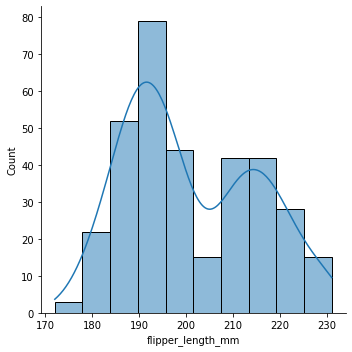

In [22]:
# histogram plus kde

penguins = sns.load_dataset("penguins")
sns.displot(data=penguins, x="flipper_length_mm", kde=True);

# Huh, flipper length a bi-modal distribution????

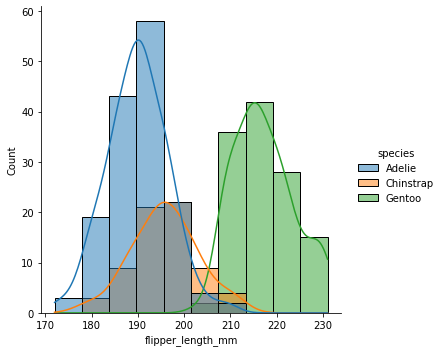

In [23]:
sns.displot(data=penguins, x="flipper_length_mm", kde=True,
            hue='species');

# Type of distribution

* Normal, log-normal, Pareto, power-law,.....

#### be careful

* With a normal distribution, the mean (and the std) make (much) sense
* With a right skewed distribution, they might not
    * mean is (much) higher than median
    * 2 stds left of mean may already be an impossible value (eg below zero)
    
![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Comparison_mean_median_mode.svg/560px-Comparison_mean_median_mode.svg.png)

# Wrap up: what did we do?

1. How to get the most out of this course?
1. What is ML, several types of ML
2. Evaluation, baselines
3. Understand what you are doing using good pictures